In [131]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import cv2
import matplotlib.patches as patches

In [132]:
section = (70, 71)

In [133]:
nii_file_path = "../data/30.nii"
nii_source_sink_path = "../data/30_ss.nii"

In [134]:
# Read nii file
nii_file = nib.load(nii_file_path)
nii_file_data = nii_file.get_fdata()

try:
    # Read nii file
    nii_source_sink = nib.load(nii_source_sink_path)
    nii_source_sink_data = nii_source_sink.get_fdata()
except:
    nii_source_sink_data = None


In [135]:
nii_file_data = nii_file_data[..., section[0]:section[1]]
if nii_source_sink_data is not None:
    nii_source_sink_data = nii_source_sink_data[..., section[0]:section[1]]

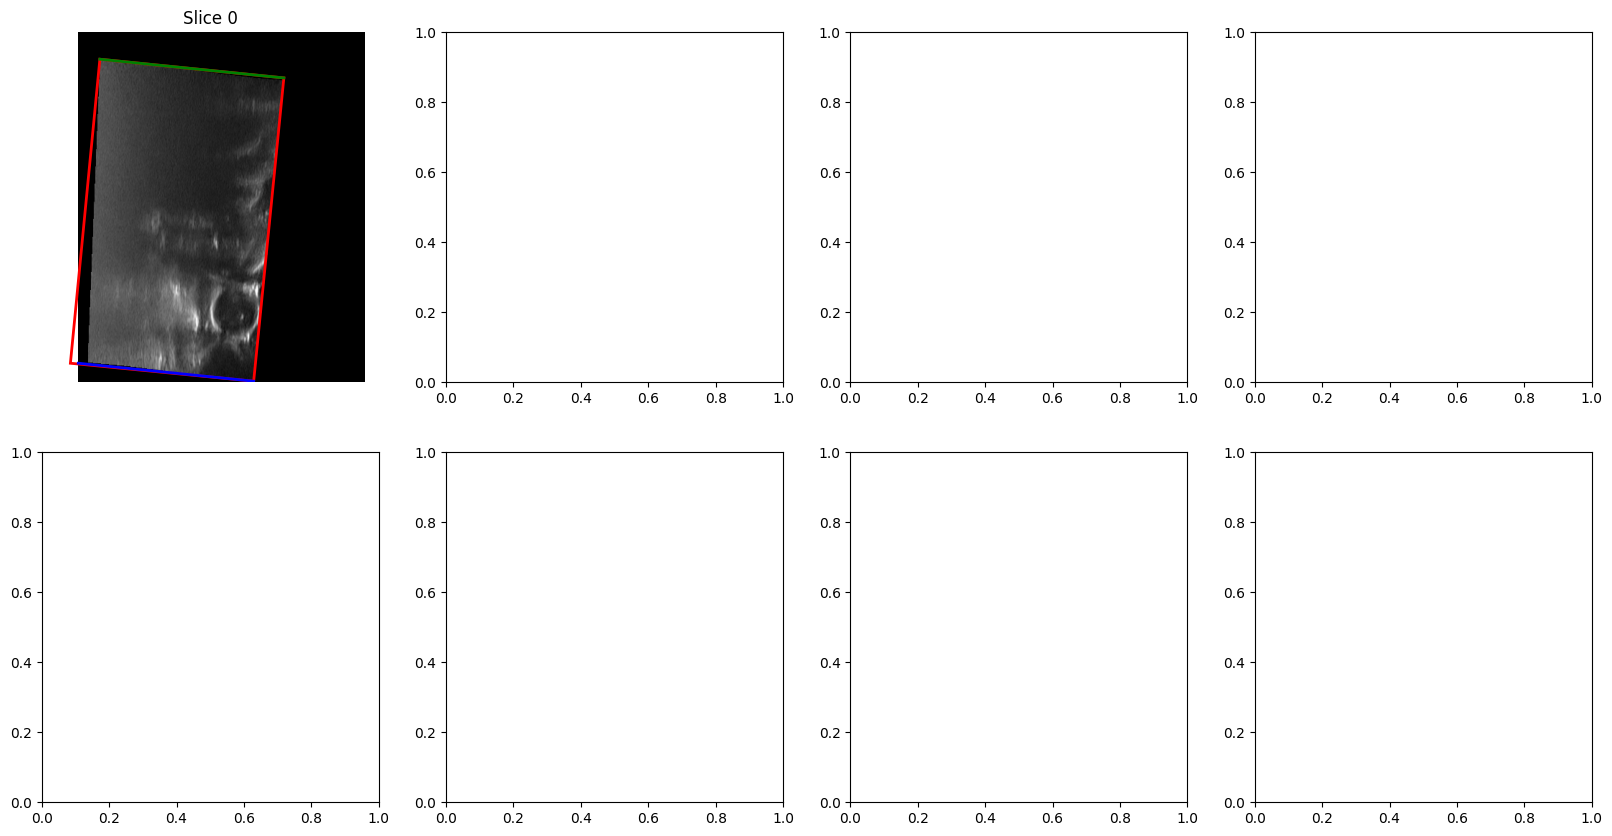

In [136]:
# Plot random slices

num_slices = nii_file_data.shape[2]
num_rows = 2
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
idxs = np.arange(num_slices)

for i in range(num_rows):
    for j in range(num_cols):

        if i * num_cols + j >= num_slices:
            break

        #slice_index = np.random.randint(num_slices)
        slice_index = idxs[i * num_cols + j]
        slice = nii_file_data[..., slice_index].astype("uint8")

        # Find contours
        contours, _ = cv2.findContours((slice != 0).astype("uint8"), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Find the rotated bounding box of the largest contour
        largest_contour = max(contours, key=cv2.contourArea)
        rect = cv2.minAreaRect(largest_contour)

        # Convert rect to box
        box = cv2.boxPoints(rect)
        box = np.int0(box)  # convert to int

        # Sort points by y-coordinate
        sorted_points = sorted(box, key=lambda point: point[1])

        # The top side is formed by the first two points (smallest y)
        top_side = sorted_points[:2]

        # The bottom side is formed by the last two points (largest y)
        bottom_side = sorted_points[2:]

        top_side = np.clip(top_side, 0, slice.shape[0] - 1)
        bottom_side = np.clip(bottom_side, 0, slice.shape[0] - 1)

        # Create a Polygon patch and add it to the plot
        poly_patch = patches.Polygon(box, edgecolor='r', fill=False, linewidth=2)

        axes[i, j].imshow(slice, cmap="gray")

        # Add the patch to the current axis
        axes[i, j].add_patch(poly_patch)

        # Make top side green
        axes[i, j].plot([top_side[0][0], top_side[1][0]], [top_side[0][1], top_side[1][1]], color="g", linewidth=2)

        # Make bottom side blue
        axes[i, j].plot([bottom_side[0][0], bottom_side[1][0]], [bottom_side[0][1], bottom_side[1][1]], color="b", linewidth=2)

        axes[i, j].axis("off")
        axes[i, j].set_title(f"Slice {slice_index}")

plt.show()


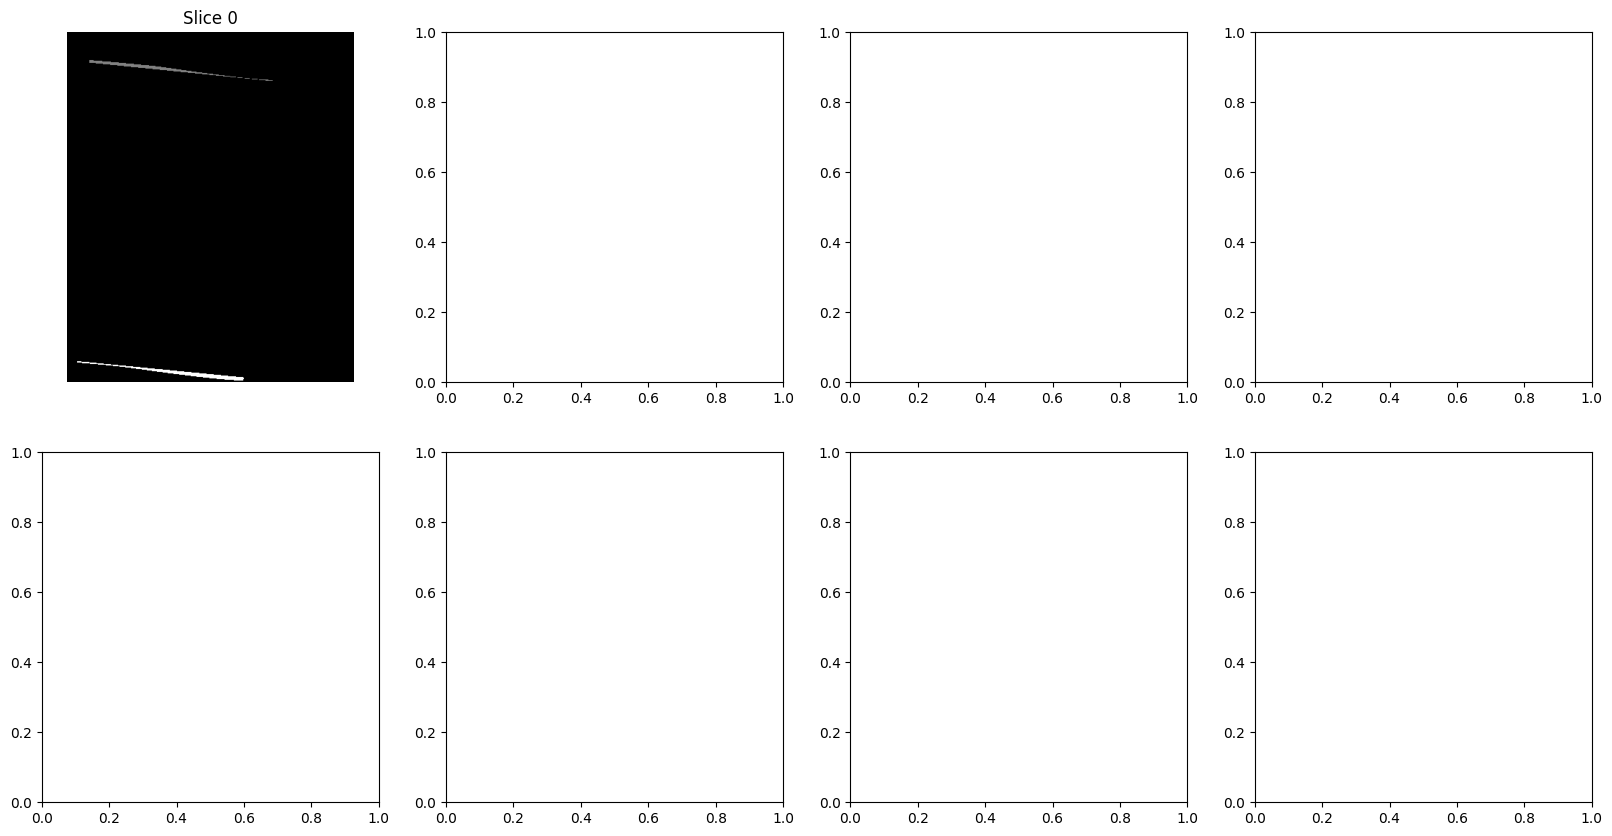

In [137]:
# Plot random slices

num_slices = nii_file_data.shape[2]
num_rows = 2
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
idxs = np.arange(num_slices)

if nii_source_sink_data is not None:
    for i in range(num_rows):
        for j in range(num_cols):

            if i * num_cols + j >= num_slices:
                break

            #slice_index = np.random.randint(num_slices)
            slice_index = idxs[i * num_cols + j]
            slice = nii_source_sink_data[..., slice_index].astype("uint8")

            # Make 1's red and 2's blue
            axes[i, j].imshow(slice, cmap="gray")

            axes[i, j].axis("off")
            axes[i, j].set_title(f"Slice {slice_index}")

    plt.show()


In [138]:
confidence_map_path = "../data/confidence_map_3d_30.nii"

In [139]:
# Read confidence map

confidence_map = nib.load(confidence_map_path)
confidence_map_data = confidence_map.get_fdata()

confidence_map_data = np.clip(confidence_map_data, 0, 1) * 255
confidence_map_data = confidence_map_data.astype(np.uint8)

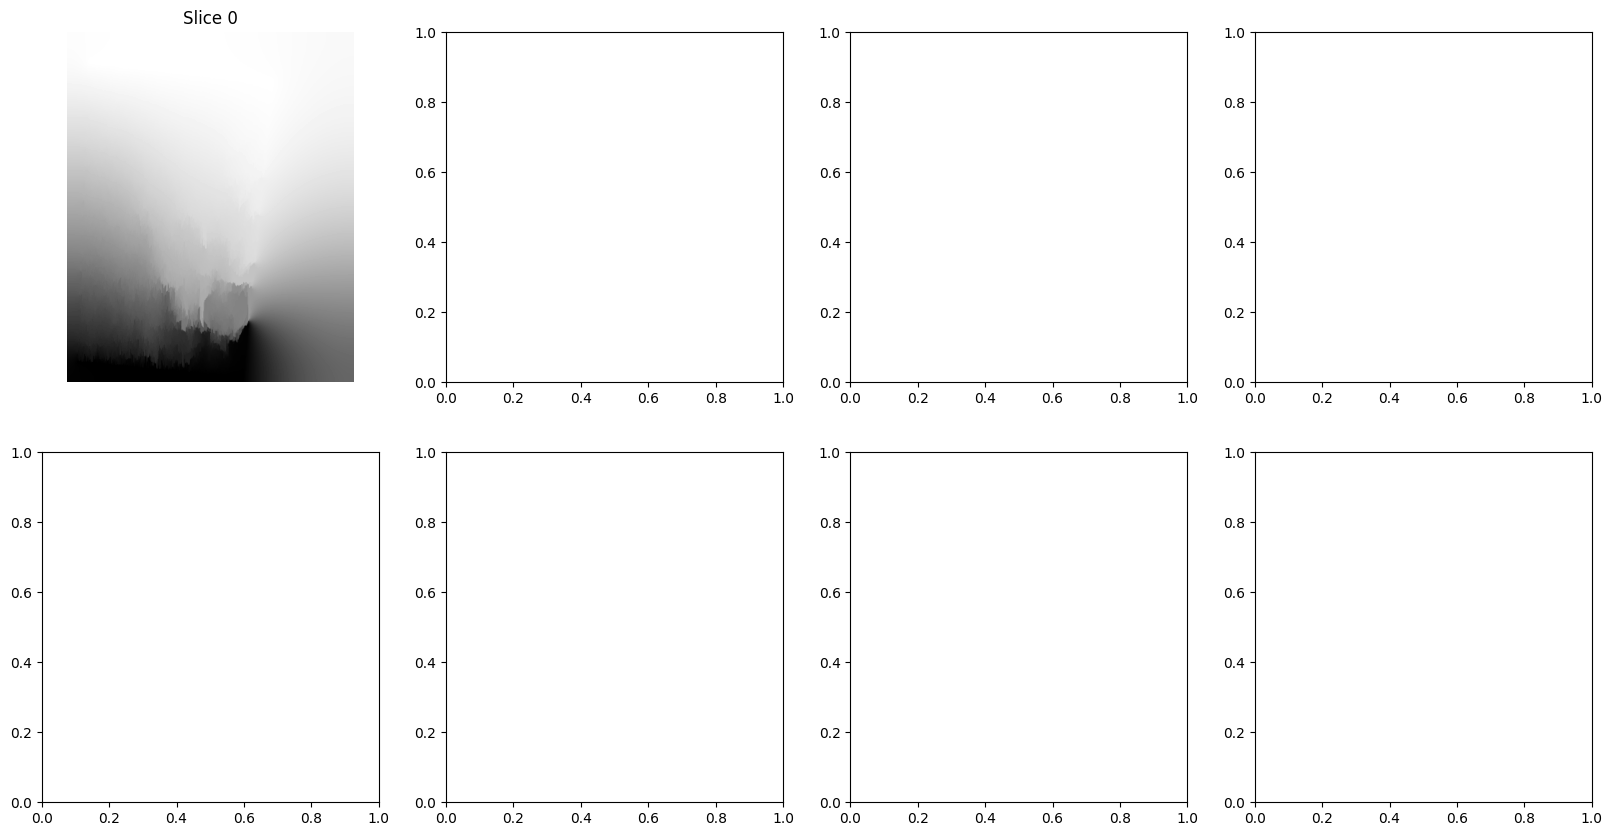

In [140]:
# Plot random slices with corresponding confidence maps side by side

num_slices = confidence_map_data.shape[2]
num_rows = 2
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

indices = np.arange(num_slices)

for i in range(num_rows):
    for j in range(num_cols):

        if i * num_cols + j >= num_slices:
            break

        slice_index = indices[num_rows * i + j] #np.random.randint(num_slices)

        nii_slice = nii_file_data[..., slice_index]
        confidence_map_slice = confidence_map_data[..., slice_index]

        concat = np.concatenate((nii_slice, confidence_map_slice), axis=1)

        #axes[i, j].imshow(concat, cmap="gray")
        axes[i, j].imshow(confidence_map_slice, cmap="gray")
        axes[i, j].axis("off")
        axes[i, j].set_title(f"Slice {slice_index}")

plt.show()
